# Visualization of Light Sources

This example visualizes multiple light sources such as AM1.5 Global, AM1.5 Direct, and AM0 for sunlight.  The details of these light sources can be found in [this link](https://www.nrel.gov/grid/solar-resource/spectra.html).

Firstly, required packages are imported.

In [1]:
import jax.numpy as jnp
import numpy as onp
import matplotlib.pyplot as plt

import jaxlayerlumos.utils_units as jll_utils_units
import jaxlayerlumos.utils_light_sources as jll_utils_light_sources

Wavelengths from 280 nm to 4000 nm are defined. Along with `wavelengths`, `wavelengths_in_nm` in nanometers is declared.

In [2]:
wavelengths = jnp.linspace(280e-9, 4000e-9, 2000)
wavelengths_in_nm = jll_utils_units.convert_m_to_nm(wavelengths)

We retrieve the light sources of AM1.5 Global, AM1.5 Direct, and AM0 using our software.

In [3]:
irradiance_AM1p5G = jll_utils_light_sources.get_irradiance('AM1p5G', wavelengths)
photon_flux_AM1p5G = (irradiance_AM1p5G * wavelengths) / (jll_utils_units.get_planck_constant() * jll_utils_units.get_light_speed())
total_photons_AM1p5G = onp.trapezoid(photon_flux_AM1p5G, wavelengths_in_nm)

irradiance_AM1p5D = jll_utils_light_sources.get_irradiance('AM1p5D', wavelengths)
photon_flux_AM1p5D = (irradiance_AM1p5D * wavelengths) / (jll_utils_units.get_planck_constant() * jll_utils_units.get_light_speed())
total_photons_AM1p5D = onp.trapezoid(photon_flux_AM1p5D, wavelengths_in_nm)

irradiance_AM0 = jll_utils_light_sources.get_irradiance('AM0', wavelengths)
photon_flux_AM0 = (irradiance_AM0 * wavelengths) / (jll_utils_units.get_planck_constant() * jll_utils_units.get_light_speed())
total_photons_AM0 = onp.trapezoid(photon_flux_AM0, wavelengths_in_nm)

print(f"Total photons of AM1.5G: {total_photons_AM1p5G:.4e}")
print(f"Total photons of AM1.5D: {total_photons_AM1p5D:.4e}")
print(f"Total photons of AM0: {total_photons_AM0:.4e}")

Total photons of AM1.5G: 4.3053e+21
Total photons of AM1.5D: 3.9873e+21
Total photons of AM0: 6.1480e+21


We plot spectral irradiance over wavelengths for AM1.5 Global, AM1.5 Direct, and AM0.

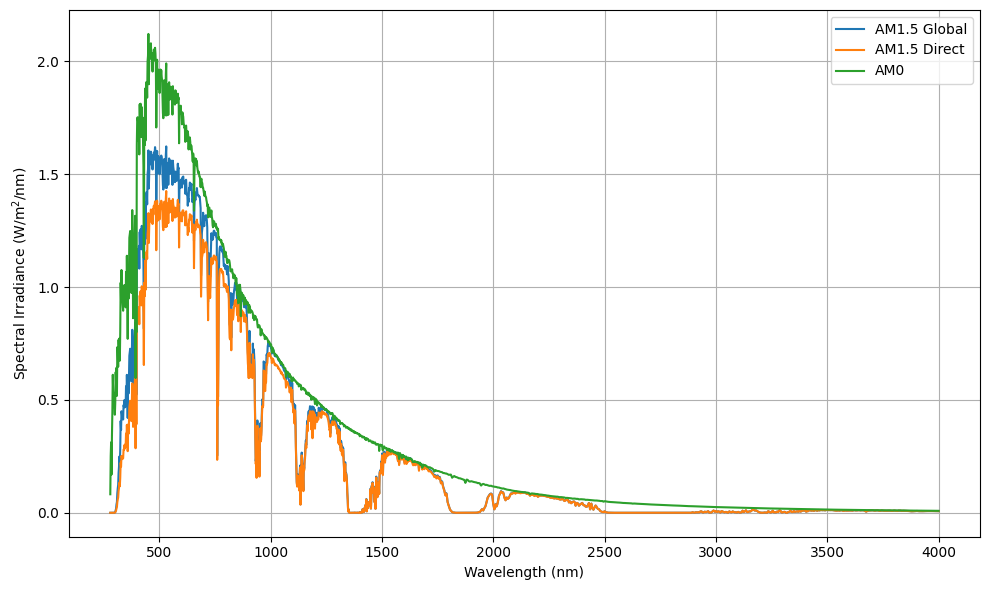

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()

ax.plot(wavelengths_in_nm, irradiance_AM1p5G, label='AM1.5 Global')
ax.plot(wavelengths_in_nm, irradiance_AM1p5D, label='AM1.5 Direct')
ax.plot(wavelengths_in_nm, irradiance_AM0, label='AM0')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Spectral Irradiance (W/m$^2$/nm)')
ax.grid()

plt.legend()
plt.tight_layout()
plt.show()